In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 36.4 MB/s eta 0:00:0000:0100:01


In [5]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import numpy as np

In [6]:
df = pd.read_csv("data/conso_data.csv")

In [7]:
# Convert object to category
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

In [8]:
X = df.drop(columns="pitd") #target
y = df['pitd']

In [9]:
num_variables = X.columns[X.dtypes == 'float64'].tolist()
cat_variables = X.columns[X.dtypes == 'category'].tolist()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [11]:
model = CatBoostRegressor(cat_features=cat_variables)

model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=0)

In [12]:
y_pred = model.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {mse:.0f}")

Root Mean Squared Error: 12224


# Plot

In [ ]:
# Extract RMSE
train_errors = model.get_evals_result()['learn']['RMSE']
val_errors = model.get_evals_result()['validation']['RMSE']

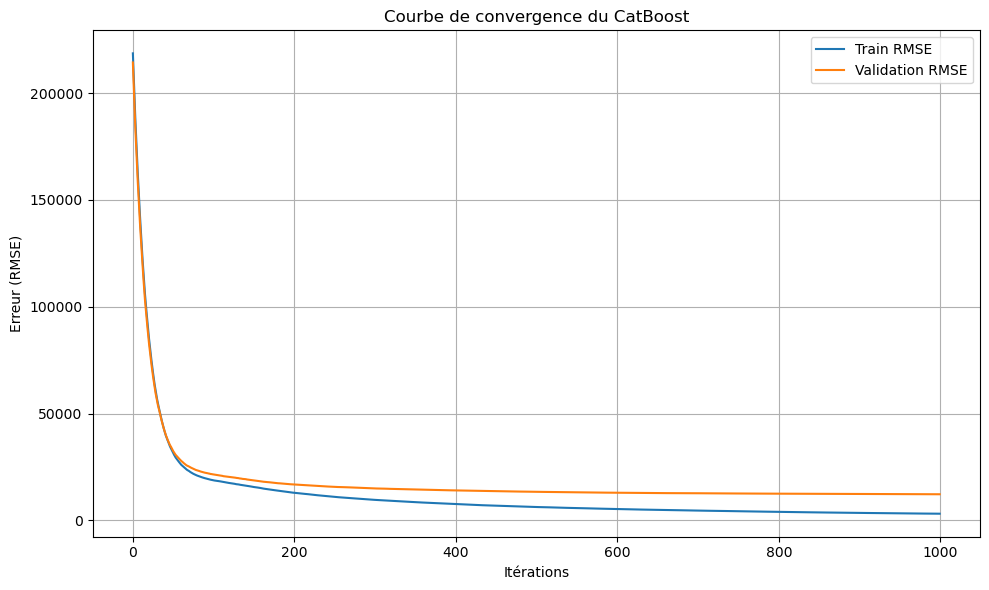

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train RMSE')
plt.plot(val_errors, label='Validation RMSE')
plt.xlabel("Itérations")
plt.ylabel("Erreur (RMSE)")
plt.title("Courbe de convergence du CatBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()